In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
file = "./Database/AirPassengers.csv"

airpassengers_df = pd.read_csv(file)

In [134]:
""" Long-form vs. wide-form dat"""

' Long-form vs. wide-form dat'

In [135]:
"""LONG FORM"""

#ajustando os dados
airpassengers_df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [136]:
airpassengers_df["Month"] = pd.to_datetime(airpassengers_df["Month"])
airpassengers_df["mes"] = airpassengers_df["Month"].dt.month_name()
airpassengers_df["ano"] = airpassengers_df["Month"].dt.year
airpassengers_df.head(3)

,Month,#Passengers,mes,ano
0,1949-01-01,112,January,1949
1,1949-02-01,118,February,1949
2,1949-03-01,132,March,1949


In [137]:
#utilizar uma vez slice

airpassengers_df = airpassengers_df.iloc[:,1:] 
airpassengers_df


,#Passengers,mes,ano
0,112,January,1949
1,118,February,1949
2,132,March,1949
3,129,April,1949
4,121,May,1949
...,...,...,...
139,606,August,1960
140,508,September,1960
141,461,October,1960
142,390,November,1960


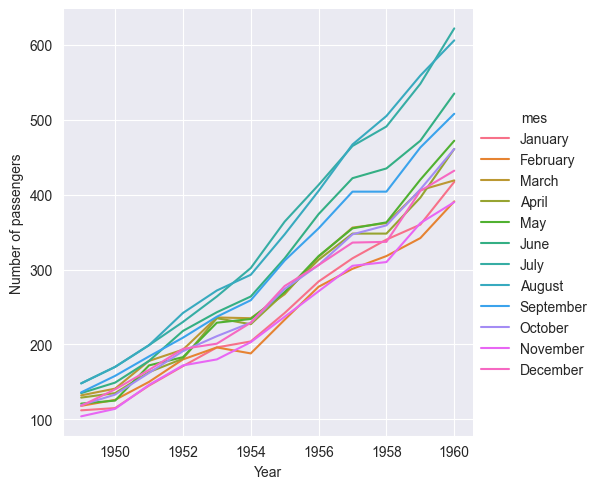

In [74]:
# Com dados de formato longo, as colunas na tabela recebem funções no gráfico, atribuindo-as explicitamente a uma das variáveis.
# Por exemplo, fazer um gráfico mensal do número de passageiros por ano fica assim:
sns.set_style(style = "darkgrid")
sns.relplot(airpassengers_df, x = "ano", y = "#Passengers", hue = "mes", kind = "line")
plt.xlabel("Year")
plt.ylabel("Number of passengers")
plt. show()

In [38]:
"""Wide-form data"""

#ajustando os dados
airpassengers_wide_df = airpassengers_df.pivot(index = "ano", columns= "mes", values= "#Passengers")
airpassengers_wide_df

mes,April,August,December,February,January,July,June,March,May,November,October,September
ano,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


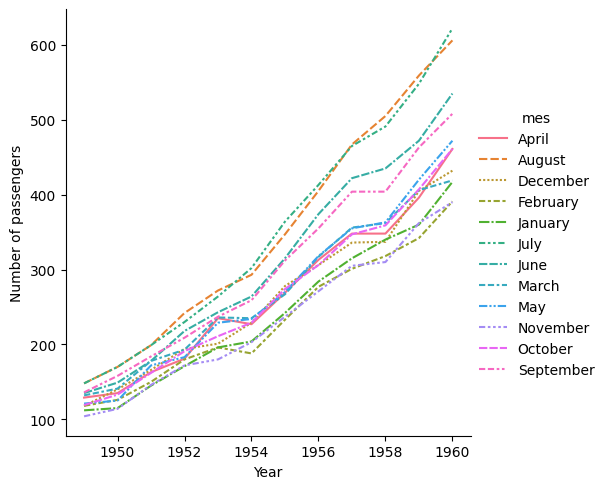

In [39]:
sns.relplot(airpassengers_wide_df, kind = "line")
plt.ylabel("Number of passengers")
plt.xlabel("Year")
plt.show()

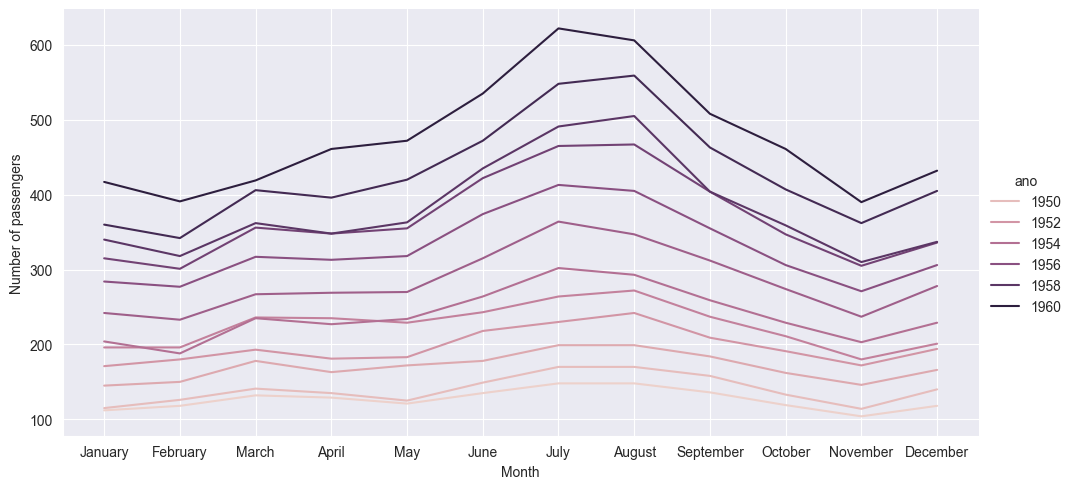

In [119]:
# long
sns.set_style("darkgrid")
sns.relplot(airpassengers_df, x = "mes", y = "#Passengers", hue = "ano",kind = "line", height=5,aspect=2)
plt.xlabel("Month")
plt.ylabel("Number of passengers")
plt.show()


In [65]:
airpassengers_transposeWide_df = airpassengers_wide_df.transpose()
airpassengers_transposeWide_df
# É preciso organizar os mêses

ano,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
mes,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


In [66]:
#Oganizando os mêses
meses_numeros = ['January','February','March','April','May','June','July','August', 'September',
    'October','November','December']

airpassengers_transposeWide_df.index = pd.Categorical(airpassengers_transposeWide_df.index,categories= meses_numeros, ordered = True)
airpassengers_transposeWide_df = airpassengers_transposeWide_df.sort_index()
airpassengers_transposeWide_df

ano,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508
October,119,133,162,191,211,229,274,306,347,359,407,461


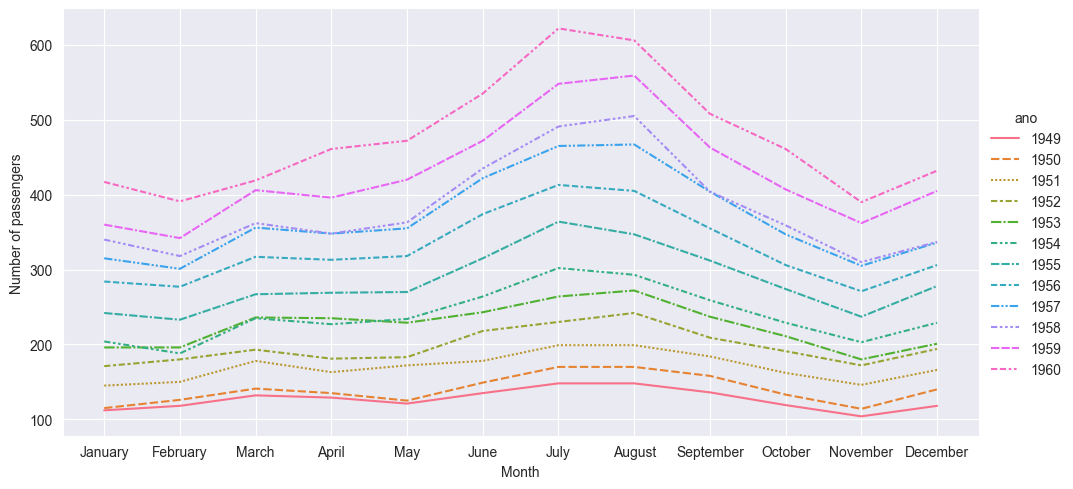

In [128]:
#wide
sns.set_style("darkgrid")
sns.relplot(airpassengers_transposeWide_df, kind = "line",height=5,aspect=2)
plt.xlabel("Month")
plt.ylabel("Number of passengers")
plt.show()

mes,April,August,December,February,January,July,June,March,May,November,October,September
ano,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184


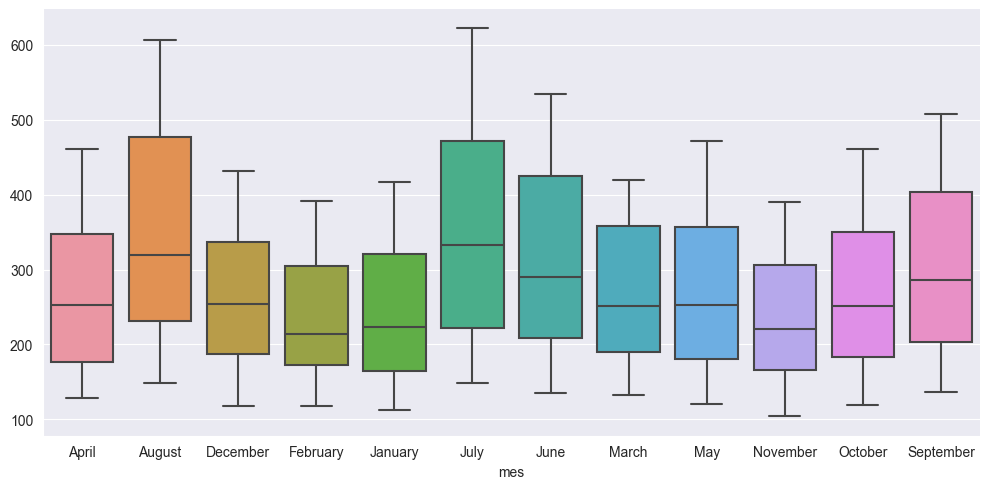

In [92]:
#Quando usamos o wide form todos os eixos são considerados categóricos, por isso podemos utilizar o catplot
display(airpassengers_wide_df.head(3))
sns.set_style("darkgrid")
sns.catplot(airpassengers_wide_df, kind = "box", height=5, aspect= 2)
plt.show()


In [ ]:
#Alguns tipos de dados não considerados nem wide nem long, normalmente experimentos repetitivos.
#Como representar: 

In [98]:
file2 = "./Database/psychology experiment.xlsx"

experimento_df =pd.read_excel(file2)

#excluindo coluna que não será usada
experimento_df = experimento_df.drop(columns="Column1")
experimento_df["num2"] = experimento_df["num2"]/10

In [99]:
experimento_df

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [114]:
# TRANSFORMANDO EM UM DATAFRAME LONG
long_df = experimento_df.melt(id_vars=("subidr","attnr"),var_name= "solutions", value_name="score")
long_df.head(12)

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0
5,6,divided,num1,5.0
6,7,divided,num1,5.0
7,8,divided,num1,5.0
8,9,divided,num1,2.0
9,10,divided,num1,6.0


In [103]:
# Exemplo do uso da função Melt, apenas um exemplo fora de contexto.
# data = {'Nome': ['Alice', 'Bob', 'Charlie'],
#         'Idade': [25, 30, 35],
#         'Altura': [160, 175, 180]}
# df = pd.DataFrame(data)

# # Aplicar a função melt()
# df_melted = df.melt(id_vars='Nome', var_name='Variavel', value_name='Valor')
# print(df)
# print(df_melted)

      Nome  Idade  Altura
0    Alice     25     160
1      Bob     30     175
2  Charlie     35     180 /n
      Nome Variavel  Valor
0    Alice    Idade     25
1      Bob    Idade     30
2  Charlie    Idade     35
3    Alice   Altura    160
4      Bob   Altura    175
5  Charlie   Altura    180


<function matplotlib.pyplot.show(close=None, block=None)>

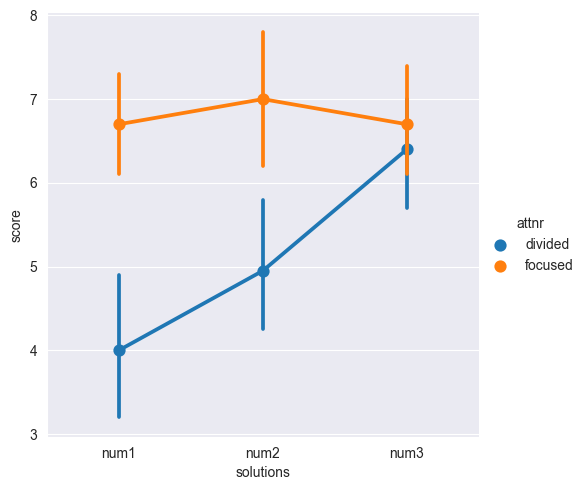

In [126]:
#Após transformamos para o moledo long fica mais facil de apresentarmos o grafíco.
sns.set_style("darkgrid")
sns.catplot(long_df, x ="solutions", y="score", hue ="attnr", kind = "point")
plt.show

In [143]:
#Muitas das funções do pandas pode jogar uma coluna direto para o indíce, desde que o nome seja mantido é possivel fazer referencia.
display(airpassengers_df.head(5))
airpassengers_media = airpassengers_df.groupby("ano")["#Passengers"].mean()
display(airpassengers_media.head(5))

,#Passengers,mes,ano
0,112,January,1949
1,118,February,1949
2,132,March,1949
3,129,April,1949
4,121,May,1949


ano
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
Name: #Passengers, dtype: float64

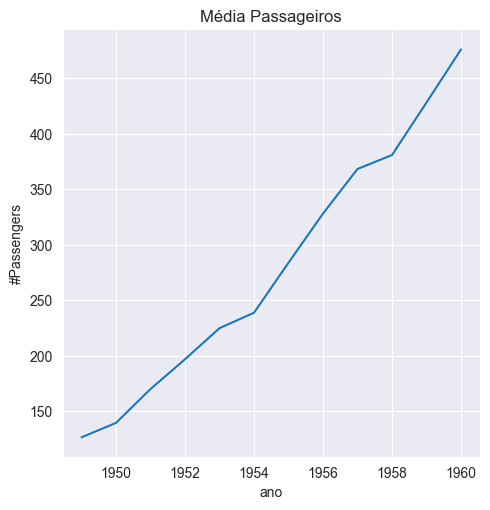

In [155]:
sns.relplot(airpassengers_media, kind = "line")
plt.title("Média Passageiros")
plt.show()

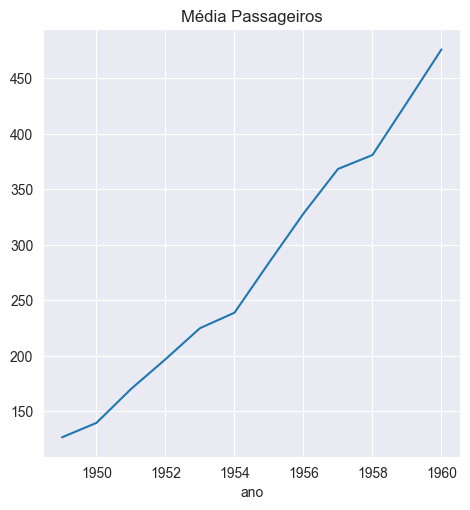

In [156]:
#caso a variavel esteja no index é possivel atribui-la 
#Listas e objetos numpy, também podem ser representados
x = airpassengers_media.index
y = airpassengers_media.values
sns.relplot(x=x, y=y, kind ="line")
plt.title("Média Passageiros")
plt.show()

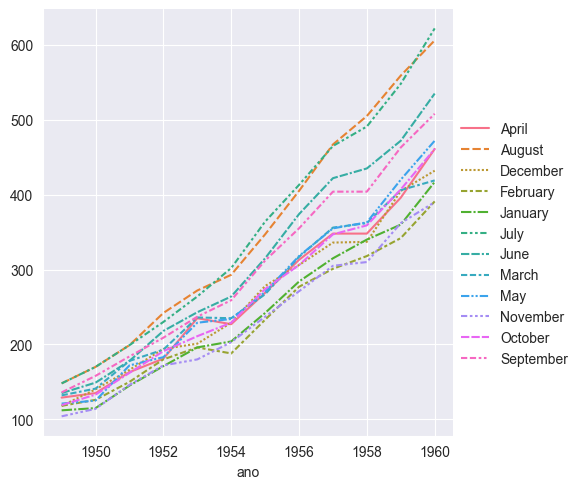

In [161]:
#Para representarmos alguns dados dados no formado wide, podemos usar lista, mas os arquivos perderão as legendas.
wide_list = [col for _, col in airpassengers_wide_df.items()]
sns.relplot(wide_list, kind="line")
plt.show()

In [173]:
#Os vetores em um coleção não precisarão ter o mesmo tamanho se tiverem um índice.
display(airpassengers_wide_df)
serieA = airpassengers_wide_df.loc[:1955,"January"]
serieB = airpassengers_wide_df.loc[1950:,"March"]
display(f"A = {serieA}")
display(f"B = {serieB}")
serie = [serieA,serieB]

mes,April,August,December,February,January,July,June,March,May,November,October,September
ano,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


'A = ano\n1949    112\n1950    115\n1951    145\n1952    171\n1953    196\n1954    204\n1955    242\nName: January, dtype: int64'

'B = ano\n1950    141\n1951    178\n1952    193\n1953    236\n1954    235\n1955    267\n1956    317\n1957    356\n1958    362\n1959    406\n1960    419\nName: March, dtype: int64'

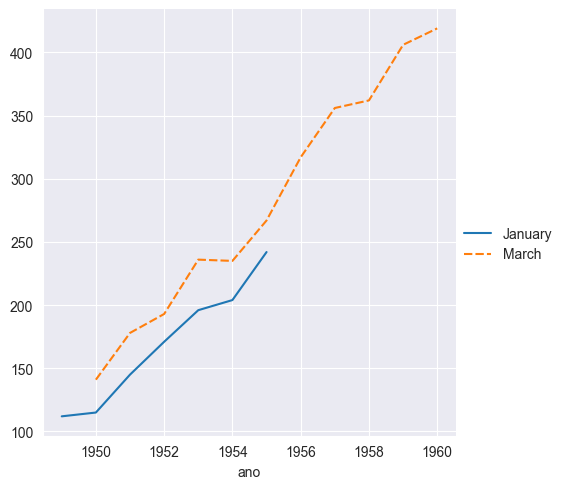

In [176]:
sns.relplot(serie, kind = "line")
plt.show()

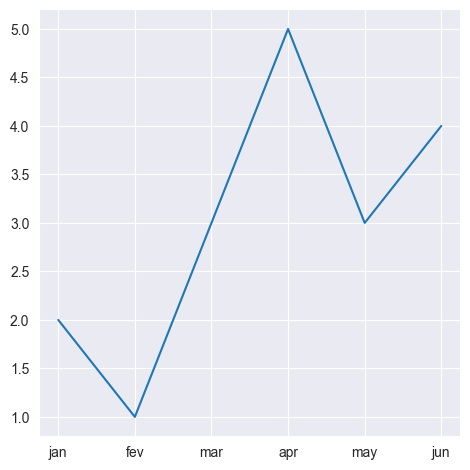

In [180]:
#vale o mesmo para os dicionarios.
dict = {
    "jan":2,
    "fev":1,
    "mar":3,
    "apr":5,
    "may":3,
    "jun":4
}
sns.relplot(dict, kind = "line")
plt.show()

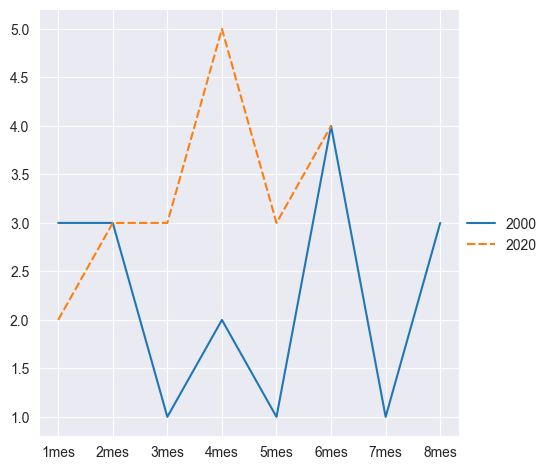

In [187]:
dict = { "2000":{"1mes":3,"2mes":3,"3mes":1,"4mes":2,"5mes":1,"6mes":4,"7mes":1,"8mes":3},
         "2020":{"1mes":2,"2mes":3,"3mes":3,"4mes":5,"5mes":3,"6mes":4}
}

sns.relplot(dict, kind = "line")
plt.show()